In [3]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

# Data Series - NY.GDP.PCAP.KD - GDP per capita constant 2005 US$
# Data Series - SE.XPD.TERT.ZS - Expenditure on tertiary education (% of government expenditure on education)
# Country series - LAM - Latin America
# Country series - EUU - European Union

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Urban Migration and GDP Growth</p>
# Exploring a Correlation between GDP Growth and Urban Population Percentage

Is there a link between how many people live in citiets and GDP growth? This quick study seeks to find a correlation between the percentage of population living in urban areas and GDP per capita. We'll focus on two particular areas: The European Union as a whole, and Latin America. <br><br>
The data we'll be examining is from the "World Bank Development Indicators" dataset, found on Kaggle here: https://www.kaggle.com/worldbank/world-development-indicators/version/2

In [183]:
import pandas as pd #Start by importing the libraries that we'll need. Pandas and numpy are pretty standard for DS projects
import numpy as np
import random #Random in case it's necessary later
import matplotlib.pyplot as plt #We'll probably end up with some kind of visualization in this project
print('Libraries imported ok') #Print a message letting us know everyting imported OK because it looks neat

Libraries imported ok


In [184]:
data = pd.read_csv('/Users/chrismay/Desktop/UCSDx/world-development-indicators/Indicators.csv') #Read the csv into a pandas dataframe
data.shape #Let's see how many rows are in this bad boy

(5656458, 6)

Well, that's quite a few rows. This particular file includes every country and every bit of available data from the World Bank on them. We're only looking at two specific regions, so let's start by paring the dataframe down to our two "countries" of interest, and the indicators of interest.

In [185]:
euMask = ('EUU') # Set a tuple equal to our two countries
indicator1Mask = ('GDP per capita (constant 2005 US$)')
indicator2Mask = ('Urban population (% of total)')
lamMask = ('LCN')

Check to make sure we got it right

In [186]:
euMask, indicator1Mask, lamMask, indicator2Mask

('EUU',
 'GDP per capita (constant 2005 US$)',
 'LCN',
 'Urban population (% of total)')

Great, those are the two areas we're looking for: LAM is Latin America (developing only) and EUU is the European Union. In this quick study, aside from looking for a correlation between Urban Population % and GDP growth, we also want to look at whether there's a difference between developing and developed areas. 

In [187]:
#Define the filter criteria for the EU data
euCriteria = (data['CountryCode'] == euMask) & (data['IndicatorName'] == indicator1Mask) \
| (data['CountryCode'] == euMask) & (data['IndicatorName'] == indicator2Mask) 

eu_data = data.loc[euCriteria] #And then assign it to its own dataframe

#Now do the same for the Latin American data
lamCriteria = (data['CountryCode'] == lamMask) & (data['IndicatorName'] == indicator1Mask) \
| (data['CountryCode'] == lamMask) & (data['IndicatorName'] == indicator2Mask) 
lam_data = data.loc[lamCriteria]

And let's run through heads for each dataframe to make sure it's what we want

In [188]:
eu_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
835,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960
905,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,61.212898
24146,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,9406.278461
24221,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1961,61.673607
50814,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,9777.297995


In [189]:
lam_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1436,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,2316.355110
1536,Latin America & Caribbean (all income levels),LCN,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,49.284688
24837,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,2394.328121
24950,Latin America & Caribbean (all income levels),LCN,Urban population (% of total),SP.URB.TOTL.IN.ZS,1961,50.073454
51556,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,2436.179328


Ok, we've separated out the data we're interested into two data frames. One for European Union and one for Latin America. 
<br><br>Because of the ordering in the original file, the indices aren't in a useful order. 
<br><br>Let's split and then recombine the data sets so that our years are lined up. 

In [190]:
#Set up filtering criteria again
euGdpCriteria = (eu_data['CountryCode'] == euMask) & (eu_data['IndicatorName'] == indicator1Mask) 
lamGdpCriteria = (lam_data['CountryCode'] == lamMask) & (lam_data['IndicatorName'] == indicator1Mask) 
euUrbCriteria = (eu_data['CountryCode'] == euMask) & (eu_data['IndicatorName'] == indicator2Mask) 
lamUrbCriteria = (lam_data['CountryCode'] == lamMask) & (lam_data['IndicatorName'] == indicator2Mask) 

In [191]:
#And split them into four separate dataframes now
euGDP = eu_data.loc[euGdpCriteria]
euURB = eu_data.loc[euUrbCriteria]
lamGDP = lam_data.loc[lamGdpCriteria]
lamURB = lam_data[lamUrbCriteria]

Let's take a look at each to make sure it all filtered correctly

In [192]:
euGDP.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
835,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960
24146,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,9406.278461
50814,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,9777.297995
79248,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,10184.242140
107882,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,10655.177728


In [193]:
lamGDP.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1436,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,2316.355110
24837,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,2394.328121
51556,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,2436.179328
80001,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,2442.245992
108637,Latin America & Caribbean (all income levels),LCN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,2564.483780


In [194]:
euURB.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
905,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,61.212898
24221,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1961,61.673607
50898,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1962,62.126028
79334,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1963,62.619363
107968,European Union,EUU,Urban population (% of total),SP.URB.TOTL.IN.ZS,1964,63.109969


In [239]:
lamURB.head()

Year
1960    49.2847
1961    50.0735
1962    50.8727
1963    51.6745
1964     52.482
Name: Value, dtype: object

Great, the data's been separated. 

In [196]:
euGDP.shape , euURB.shape, lamGDP.shape, lamURB.shape

((55, 6), (55, 6), (55, 6), (55, 6))

Ok, so each dataset here has the same number of years, that's good news for us. <br><br> The indices for each dataframe are still a mess, so let's sort that out now

In [197]:
euGDP.set_index('Year', inplace = True)
euURB.set_index('Year', inplace = True)
lamGDP.set_index('Year', inplace = True)
lamURB.set_index('Year', inplace = True)

In [198]:
euGDP.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,8997.466960
1961,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,9406.278461
1962,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,9777.297995
1963,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,10184.242140
1964,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,10655.177728


Ok, the dataframes are now indexed by year, so there shouldn't be any issues with combining them back together now
<br><br>Let's use an inner join to pull them together

In [234]:
eu_fixed = pd.concat([euGDP, euURB], axis=1, join_axes=[euGDP.index])
lam_fixed = pd.concat([lamGDP, lamURB], axis=1, join_axes=[lamGDP.index])

In [235]:
eu_fixed.columns = ['GDP', 'UrbanPopulation%'] #Rename the columns to reflect the data contained in them 
lam_fixed.columns = ['GDP', 'UrbanPopulation%']

In [236]:
eu_fixed.head() #Check to make sure we did everything right

,GDP,UrbanPopulation%
Year,,
1960,8997.47,61.2129
1961,9406.28,61.6736
1962,9777.3,62.126
1963,10184.2,62.6194
1964,10655.2,63.11


In [285]:
lam_fixed.head() #Now check the LAM data

,GDP,UrbanPopulation%
Year,,
1960,2316.355110,49.284688
1961,2394.328121,50.073454
1962,2436.179328,50.872695
1963,2442.245992,51.674473
1964,2564.483780,52.481991


When we reformatted the dataframes, the data types for each column got changed to objects.
<br><br>This is going to cause some problems for us when we try to plot and get regression co-efficients, so let's reset them to numerics

In [256]:
eu_fixed['GDP'] = pd.to_numeric(eu_fixed['GDP'], errors = 'coerce') #The to_numeric method doesn't work with multidimensional objects
eu_fixed['UrbanPopulation%'] = pd.to_numeric(eu_fixed['UrbanPopulation%'], errors = 'coerce')
lam_fixed['GDP'] = pd.to_numeric(lam_fixed['GDP'], errors = 'coerce')
lam_fixed['UrbanPopulation%'] = pd.to_numeric(lam_fixed['UrbanPopulation%'], errors = 'coerce')

Now we have everything in the correct format, it's time to start looking at some plots

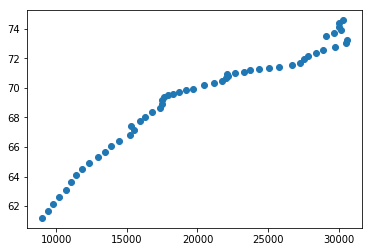

In [257]:
euGDP = eu_fixed['GDP'] 
euURB = eu_fixed['UrbanPopulation%']
plt.scatter(euGDP, euURB)

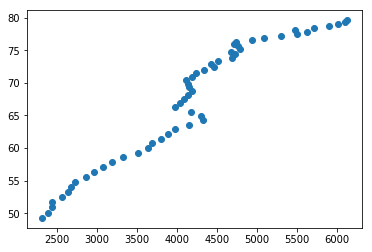

In [258]:
lamGDP = lam_fixed['GDP']
lamURB = lam_fixed['UrbanPopulation%']
plt.scatter(lamGDP, lamURB)

The first scatter plots from both datasets already look like they're showing correlation, so that's good. 
<br><br>To move on ahead with correlation co-efficients, let's open up some new libraries

In [264]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

/Users/chrismay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(55, 76.12658886384877)

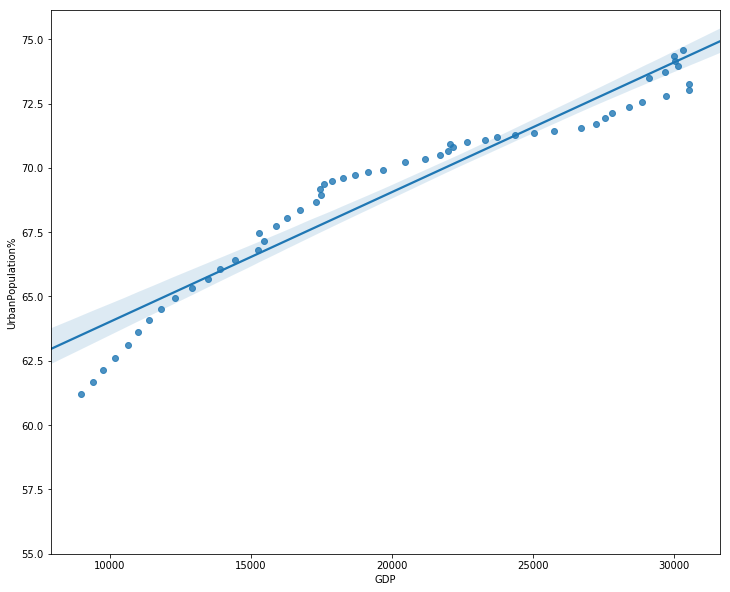

In [290]:
#First let's start with a regression plot on the EU data set
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GDP", y="UrbanPopulation%", data=eu_fixed)
plt.ylim(55,) 

In [268]:
eu_fixed[["GDP","UrbanPopulation%"]].corr()

,GDP,UrbanPopulation%
GDP,1.000000,0.962894
UrbanPopulation%,0.962894,1.000000


So it looks like there's a strong positive correlation between urban population growth and GDP growth. But it doesn't seem convincing that a linear regression is the best fit. 
<br><br>Let's look at a residual plot to check the fit

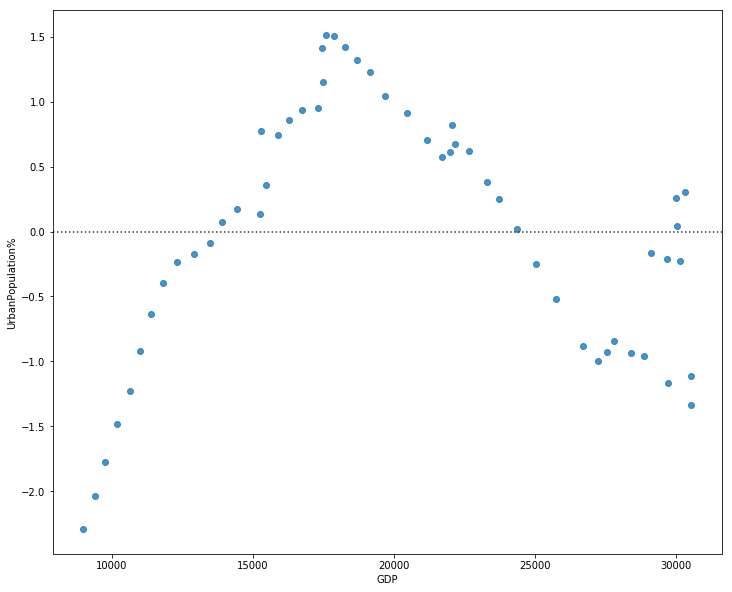

In [270]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(eu_fixed['GDP'], eu_fixed['UrbanPopulation%'])
plt.show()

We can see from the residuals plot that linear regression is probably not the best fit. 
<br>If a linear regression was a good fit, we'd expect the residuals to appear more random. Here there's a definite pattern showing
<br><br>Let's try some polynomial regression to see if we can do any better

In [275]:
def PlotPolly(model,independent_variable,dependent_variabble, Name): #Define a function that we can call
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for GDP ~ UrbanPopulation%')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('GDP per Capita')
    plt.ylabel('Urban Population %')

    plt.show()
    plt.close()

In [276]:
x = eu_fixed['GDP'] #Set some short variables to pass into the function
y = eu_fixed['UrbanPopulation%']

In [279]:
f = np.polyfit(x, y, 2) #And run the polyfit function
p = np.poly1d(f)
print(p)

LinAlgError: SVD did not converge in Linear Least Squares

The solver didn't converge, so there's some error in either our datatypes, the way that it's presented, or in the data pattern. 
<br><br>However, we're not using this regression model to make any predictions, only to show that a correlation exists. Since it's not incredibly important to tune our model at this point, it's better to just move on.

/Users/chrismay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(30, 90.07416872756521)

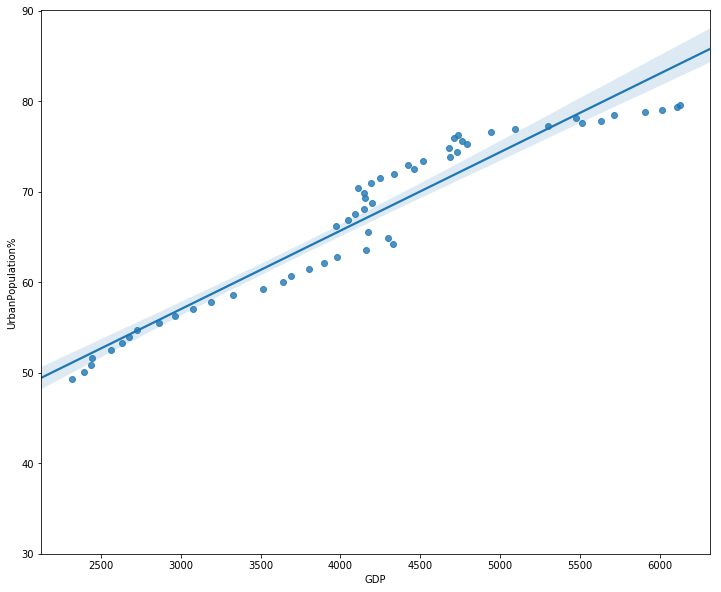

In [288]:
#Run the linear regression for the Latin American dataframe now
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GDP", y="UrbanPopulation%", data=lam_fixed)
plt.ylim(30,) 

In [283]:
lam_fixed[["GDP","UrbanPopulation%"]].corr()

,GDP,UrbanPopulation%
GDP,1.00000,0.96003
UrbanPopulation%,0.96003,1.00000


The correlation here is very similar to the European Union dataset. Let's take a look at the residuals again

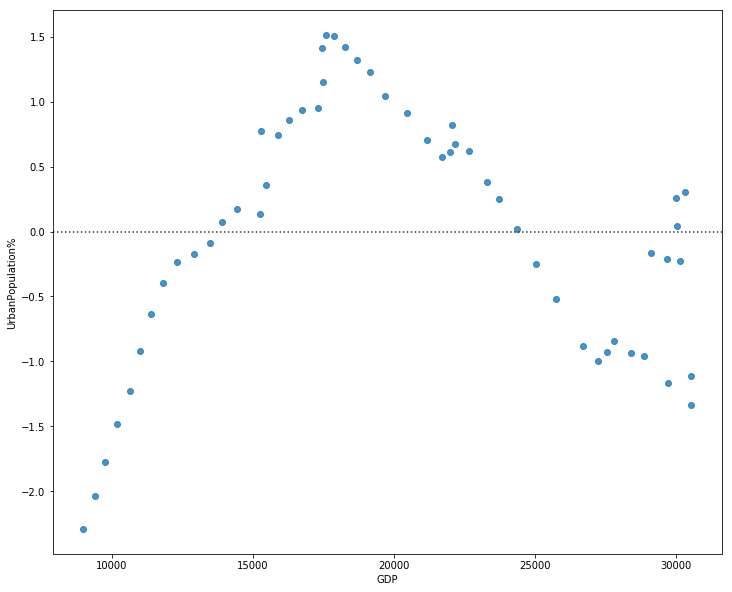

In [284]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(eu_fixed['GDP'], eu_fixed['UrbanPopulation%'])
plt.show()

There's a pattern in the residual plot again. If we were trying to run a prediction, it'd probably be worth spending more time to try some polynomial fits. Since we're just trying to show a correlation here, let's just wrap it up.